# Import

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.examples.tutorials.mnist import input_data

# Read Data

In [18]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels

# 1-NN

In [30]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
# len(train_img) == 55000
valid_img = train_img[:5000]
train_img = train_img[5000:]
valid_label = train_label[:5000]
train_label = train_label[5000:]

In [46]:
clf = KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance',p=1)
clf.fit(train_img,train_label)
valid_predictions=[]
test_predictions=[]
for i in range(1000):
    if i % 100 == 0:
        print('epoch ---> '+str(int(i/100)))
    valid_output = clf.predict([valid_img[i]])
    test_output = clf.predict([mnist.test.images[i]])
    valid_predictions.append(valid_output)
    test_predictions.append(test_output)

confusion_m = confusion_matrix(mnist.test.labels[0:1000],test_predictions)

print (classification_report(mnist.test.labels[0:1000],np.array(test_predictions)))

print ('validation accuracy is :',accuracy_score(valid_label[0:1000],valid_predictions))
print ('test accuracy is :',accuracy_score(mnist.test.labels[0:1000],test_predictions))

class_names = [chr(i) for i in range(ord('0'),ord('9')+1)]

epoch ---> 0
epoch ---> 1
epoch ---> 2
epoch ---> 3
epoch ---> 4
epoch ---> 5
epoch ---> 6
epoch ---> 7
epoch ---> 8
epoch ---> 9
             precision    recall  f1-score   support

          0       0.94      0.99      0.97        85
          1       0.94      1.00      0.97       126
          2       0.99      0.90      0.94       116
          3       0.95      0.93      0.94       107
          4       0.96      0.95      0.95       110
          5       0.97      0.98      0.97        87
          6       0.96      0.98      0.97        87
          7       0.92      0.98      0.95        99
          8       0.97      0.87      0.92        89
          9       0.93      0.97      0.95        94

avg / total       0.95      0.95      0.95      1000

('validation accuracy is :', 0.96699999999999997)
('test accuracy is :', 0.95299999999999996)


Confusion matrix, without normalization
[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   4 104   0   0   0   1   4   1   0]
 [  0   1   0 100   0   2   0   2   1   1]
 [  0   1   0   0 104   0   1   0   0   4]
 [  0   0   0   0   1  85   0   0   0   1]
 [  1   0   0   0   1   0  85   0   0   0]
 [  0   1   0   0   1   0   0  97   0   0]
 [  2   1   1   4   1   1   1   0  77   1]
 [  0   0   0   1   0   0   0   2   0  91]]


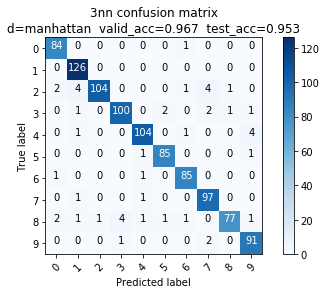

In [47]:
plot_confusion_matrix(confusion_m,classes=class_names,title='3nn confusion matrix\nd=manhattan  valid_acc='+str(accuracy_score(valid_label[0:1000],valid_predictions))+'  test_acc='+str(accuracy_score(mnist.test.labels[0:1000],test_predictions)))